In [1]:
using Plots
using DifferentialEquations
using LinearAlgebra

# Backpropogation Revisited on Feedforward Networks
A feedforward network consists of 
1. $K$ input units
2. $k$ hidden layers, and in hidden layer $m$ there are $N^m$ units
3. $L$ output units

$m \in [0, k+1]$
The weight of the edge from the $j$-th unit in layer $m$ to the $i$-th unit in layer $m+1$ is $w_{ij}^m$. Activation of the $i$-th unit in layer $m$ is $x_i^m$.

We input $u$ and want $d$ to come out

In [2]:
function feedforward(u, W, f, L)
    K = size(u)[1];
    k, N, N = size(W);
    k = k-1;
    X = zeros(Float64, (k+2, N));
    X[1,1:K] = u;
    for m in 1:k
        for i in 1:N
            X[m+1,i] = f(sum(W[m,i,:].*X[m,:]));
        end
    end
    return X[k+1,1:L], X;
end;

In [33]:
function error(D, Y)
    T, = size(D);
    E = 0.0;
    for n in 1:T
        E += norm(D[n]-Y[n], 2);
    end
    return E;
end;

In [26]:
function z(n, m, i, N, X)
    ans = 0.0;
    for j in 1:N
        ans += X[n,m-1,j]*W[m-1,i,j];
    end
    return ans;
end;

In [115]:
T = 20;
K = 2;
L = 1;
u = zeros(Float64, (T,K));
u[:,1:2] .= collect(Float64, LinRange(0, 2*pi, T));
d = 0.5*(sin.(u[:,1]) .+ cos.(u[:,2]));
y = zeros(Float64, size(d));

k = 10;
N = 10;
# W = rand(Float64, (k+1,N,N)).*2.0.-1.0;
f = tanh;
df(u) = sech(u)*sech(u);
X = zeros(Float64, (T,k+2,N));
max_iter = 250;
errors = zeros(Float64, max_iter);
for iter in 1:max_iter
    for n in 1:T
        y[n,:], X[n,:,:] = feedforward(u[n,:], W, f, L);
    end
    δ = zeros(Float64, (T,k+1,N));
    for n in 1:T
        for i in 1:L
            δ[n,k+1,i] = (d[n,i]-y[n,i])*df(z(n,k+2,i,N,X));
        end
        for m in k:-1:2
            for j in 1:N
                for i in 1:N
                    δ[n,m,j] += δ[n,m+1,i].*W[m,i,j]*df(z(n,m,j,N,X));
                end
            end
        end
    end
    γ = 0.00001;
    for m in k+1:-1:2
        for i in 1:N
            for j in 1:N
                for n in 1:T
                    W[m-1,i,j] += γ*δ[n,m,i]*X[n,m-1,j];
                end
            end
        end
    end
    errors[iter] = error(d,y);
end

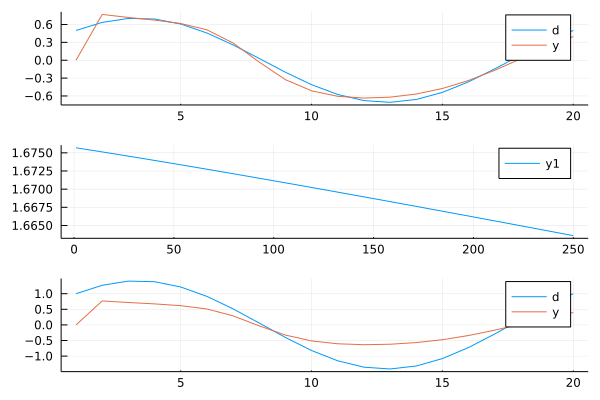

In [132]:
output = plot(d, label="d");
plot!(y, label="y");
error_plot = plot(errors);
u_predict = zeros(Float64, (T,K));
u_predict[:,1:2] .= collect(Float64, LinRange(0, 2*pi, T));
d_predict = sin.(u_predict[:,1]) + cos.(u_predict[:,2])
y_predict = zeros(Float64, T);
for n in 1:T
    y_predict[n] = feedforward(u_predict[n,:], W, f, L)[1][1];
end
prediction_plot = plot(d_predict, label="d");
plot!(y_predict, label="y");
plot(output, error_plot, prediction_plot, layout=(3,1), figsize=(120000,6))

In [130]:
size(d_predict)

(20,)

In [45]:
K = 2;
k = 2;
L = 1;
N = 4;
W = zeros(Float64, (N, k+2));
max_time = 100;
times = 1:1:max_time;
u = zeros((max_time,2));
d = zeros(Float64, length(times));
i = 1
while i < max_time
    u[i,1] = rand([0,0,0,0,1]);
    if(u[i,1]==1)
        u[i,2] = rand(0.1:0.1:1.0);
        max = floor(Int, min(i+10*u[i,2], 100));
        u[i:end,2] .= u[i,2];
        d[i:max] .= 0.5;
        i = max+10;
    else
        i = i+1;
    end
end
f = tanh;

        

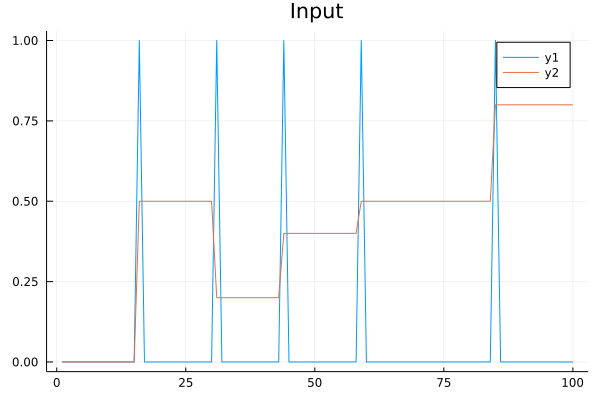

In [4]:
input_plot = plot(times, u, title="Input")


In [ ]:
function z(n, m, i)
    ans = 0.0;
    for j in 1:N
        ans += X[n,m-1,j]*W[m-1,i,j];
    end
    return ans;
end

## Backpropogation Through Time